# $$\LARGE\text{Data Project}$$


$\textbf{Unemployment in Denmark} \\ $
This project examines the development in unemployment (full-time) in Denmark by descriptive statistics. First, I examine the overall unemployment in the country and then I look into the delevopment in different age groups. Data are from Danmarks Statistik, https://www.statistikbanken.dk/AUL01. The datafile (AUL01.xlsx) can be found in the folder named "data".

## 1. Read and clean data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#a. import excel file, stored in folder named "data"
file = 'data/AUL01.xlsx' # opens excel file, which I name "file"
pd.read_excel(file, header=0).head(5) #overview of data

#b. clean data and rename
empl = pd.read_excel(file, skiprows=2) #drop first two rows
empl.drop(empl.tail(2).index,inplace=True) #drop last two rows
empl.drop(['Unnamed: 0', "Unnamed: 1", "Unnamed: 2"], axis=1, inplace=True)
empl.rename(columns = {'Unnamed: 3':'age'}, inplace=True) #The column representing age is renamed from "Unnamed: 3" to Age

#c. Following code converts the column names into strings in order to avoid problems later
Dict_column = {} 
for i in range(2010, 2020): # range goes from 2010 to 2019 
    Dict_column[str(i)] = f'e{i}' 
empl.rename(columns = Dict_column, inplace=True)

#d. convert dataset to long, for later use
empl_long = pd.wide_to_long(empl, stubnames='e', i='age', j='year')

## 2. Overview

The population is divided into 9 age groups with data for each group from year 2010 to 2019, cf. Table 1. Unit is in persons.


In [3]:
#2. print table with data
empl.style.set_precision(0).set_caption("Table 1$\hspace{0.3cm}$Full time unemployment distributed by age") #move decimals and set title

,age,e2010,e2011,e2012,e2013,e2014,e2015,e2016,e2017,e2018,e2019
0,16-24,17493,16546,16584,16208,10711,9561,8542,9181,7269,6153
1,25-29,21311,21143,22107,22905,18910,18616,19467,21871,20743,20448
2,30-34,21815,21202,21406,20261,18615,17339,16451,18031,17206,16763
3,35-39,21339,20492,20098,18846,16992,14951,13510,13831,12796,11905
4,40-44,20514,19055,18762,17783,15728,14161,12286,12155,11035,10288
5,45-49,19428,19404,19554,18389,16073,13795,11593,11010,10144,9475
6,50-54,16777,16301,16561,16075,15014,13656,12192,11747,10580,9919
7,55-59,17379,17503,17855,15050,13567,12527,10941,10333,9773,9786
8,60+,7401,7604,8317,7606,7661,7941,7535,8009,8417,9239


## 3. Descriptive statistics

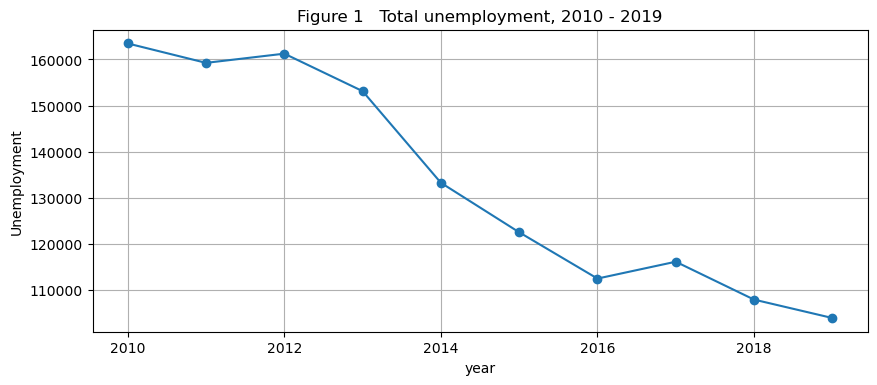

In [4]:
#FIGURE 1
fig = plt.figure(figsize=(10,4), dpi=100)
ax = fig.add_subplot(1,1,1)
empl_long.groupby('year')['e'].sum().plot( ax=ax,style='-o')
ax.set_ylabel('Unemployment')
ax.set_title('Figure 1   Total unemployment, 2010 - 2019');
ax.grid(True)

The development in total number of unemployed from 2010 to 2019 is presented in Figure 1. The graph indicates that the level of total unemployment has fallen since 2010 up until 2019. The level of unemployment was lowest at about 115.000 persons in 2019, and highest at about 165.000 in 2010. This gives a total fall in unemployment of about $30\%$ for the whole period.

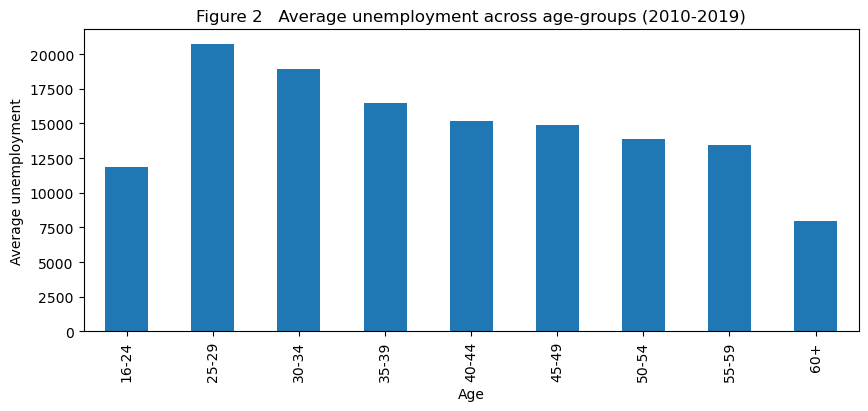

In [5]:
#FIGURE 2
fig = plt.figure(figsize=(10,4), dpi=100)
ax = fig.add_subplot(1,1,1)
empl_long.groupby('age')['e'].mean().plot.bar()
#ax.legend(frameon=True)
ax.set_xlabel('Age')
ax.set_ylabel('Average unemployment')
ax.set_title('Figure 2   Average unemployment across age-groups (2010-2019)');

Figure 2 presents the average unemployment level from 2010 to 2019 for the different age groups. The highest average level of unemployment is seen in ages 25 to 39, whereas the age group 25-29 have the highest average unemployment level at above 20.000 persons. The unemployed at age 60+ have the lowest level of unemployment in average, cf. Figure 2. 

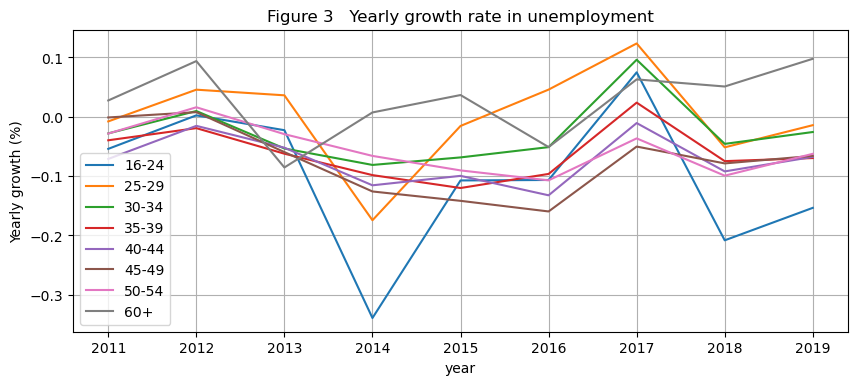

In [6]:
#FIGURE 3
e_grouped = empl_long.groupby('age')['e']
e_pct = e_grouped.pct_change() #yearly pct change in unemployment
e_pct.name = 'e_pct' # necessary for join

#a. add e_pct to data in a new column
empl_ = empl_long.join(e_pct, how='left')

#b. reset index, convert "year" into a column such that only "age" is index
empl_new = empl_.reset_index("year")

#c. plot Figure 3
age_ = ["16-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54","60+"]
fig = plt.figure(figsize=(10,4), dpi=100)
ax = fig.add_subplot(1,1,1)
for m in age_:
    empl_new.xs(m).plot(x='year',y='e_pct',ax=ax,label=m)

ax.legend(frameon=True)
ax.set_ylabel('Yearly growth (%)')
ax.set_title('Figure 3   Yearly growth rate in unemployment');
ax.grid(True)

Figure 3 presents the yearly change in unemployment for the different age groups. It seems like the unemployed in ages from 16 to 29 is most volatile through the whole period. In Figure 1 we saw an abrupt decline from 2013 to 2014 in total number of unemployment. Figure 3 indicates that the largest contribution to the development from 2013-2014 comes from the 16-29 year olds; for the 16-24 years old unemployment decreased about $33\%$ and $15\%$ for the 25-29 years old. 



## Conclusion

The level of unemployment has been decreased about $30\%$ since 2010. Among the unemployed it is clear that the persons at age 60+ have the lowest number of unemployed in average compared to the younger age groups. The second age group with lowest average level of unemployment is the 16-24 year olds, which could be explained by the fact that most of persons in that age group are students and is not considered as unemployed in Denmark. The highest average level of unemployment is seen in ages from 25 to 39.
